# Step 1: Setup and initial inspection

## Set up: laod libararies and dataset

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# load dataset
flight_delay = pd.read_csv("../data/flight_delay_sample.csv")  

## Initial inspection

In [5]:
# visualise first 5 rows
flight_delay.head()

,OP_CARRIER,DEP_DELAY_NEW,ARR_DELAY_NEW
0,AA,0,1
1,AA,0,1
2,AA,0,1
3,AA,0,1
4,AA,0,1


### Summary statistics

In [6]:
# display summary statistics
print(flight_delay.describe())

       DEP_DELAY_NEW  ARR_DELAY_NEW
count   90596.000000   90596.000000
mean       34.119453      34.283247
std        83.928236      84.133765
min         0.000000       0.000000
25%         1.000000       0.000000
50%        10.000000      10.000000
75%        34.000000      34.000000
max      3298.000000    3282.000000


In [52]:
# display summary statistics grouped by airline
summary = flight_delay.groupby("OP_CARRIER").describe()
print(summary)  

           DEP_DELAY_NEW                                                       \
                   count       mean         std  min  25%   50%   75%     max   
OP_CARRIER                                                                      
AA               31736.0  36.650555  102.226143  0.0  1.0  10.0  34.0  3298.0   
DL               32258.0  37.443518   82.097248  0.0  2.0  11.0  37.0  1209.0   
UA               26602.0  27.069055   57.260040  0.0  1.0   8.0  28.0  1154.0   

           ARR_DELAY_NEW                                                       
                   count       mean         std  min  25%   50%   75%     max  
OP_CARRIER                                                                     
AA               31736.0  37.078397  102.442627  0.0  1.0  11.0  34.0  3282.0  
DL               32258.0  37.131874   82.678698  0.0  1.0  11.0  37.0  1287.0  
UA               26602.0  27.494361   56.857823  0.0  0.0   9.0  30.0  1183.0  


# Step 2: Data preparation

In [7]:
# filter data to include only departure delay < 500 minutes
filtered_data = flight_delay[flight_delay["DEP_DELAY_NEW"] < 500]

In [13]:
# create frequency of flight per airline
flight_counts = filtered_data["OP_CARRIER"].value_counts()
print(flight_counts)  

OP_CARRIER
DL    32064
AA    31508
UA    26549
Name: count, dtype: int64


# Step 3: Create visualisations

## Generate plot showing the number of flights per each airline
It is evident that DL airline had relatively more flight, followed closely by AA ailine. UA had the least number of flights.

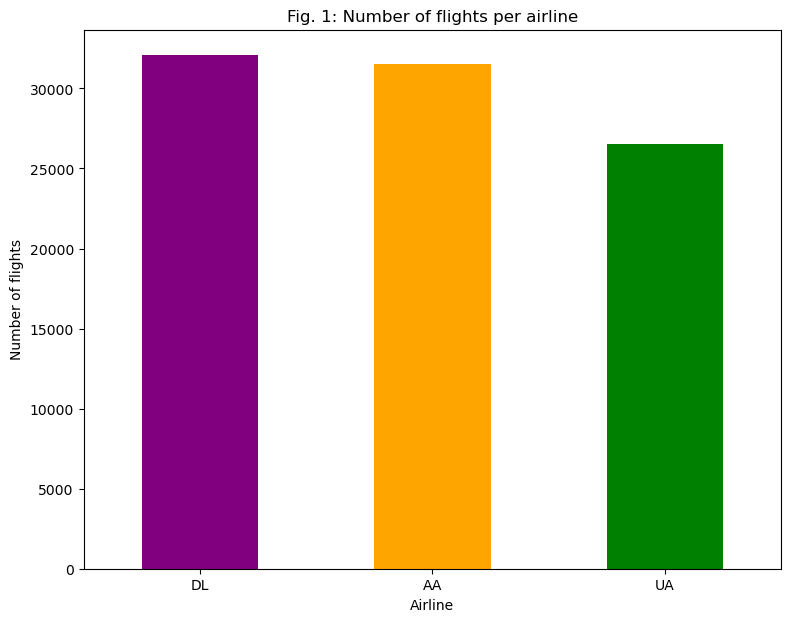

In [51]:
# generate colors
color_map = {
    'DL': 'purple',
    'AA': 'orange',
    'UA': 'green'
}
# generate the bar plot of flights per airline
plt.figure(figsize = (9,7))
flight_counts.plot(kind = 'bar', color = [color_map[a] for a in flight_counts.index])
plt.title("Fig. 1: Number of flights per airline")
plt.xlabel("Airline")
plt.ylabel("Number of flights")
plt.xticks(rotation = 0)
save_path = os.path.join("..", "figures", "barplot_flight.png")
plt.savefig(save_path)
plt.show()

## Scatter plot showing the relationship between departure delay and arrival delay
There is a strong positve correlation between departure time and arrival time of flights

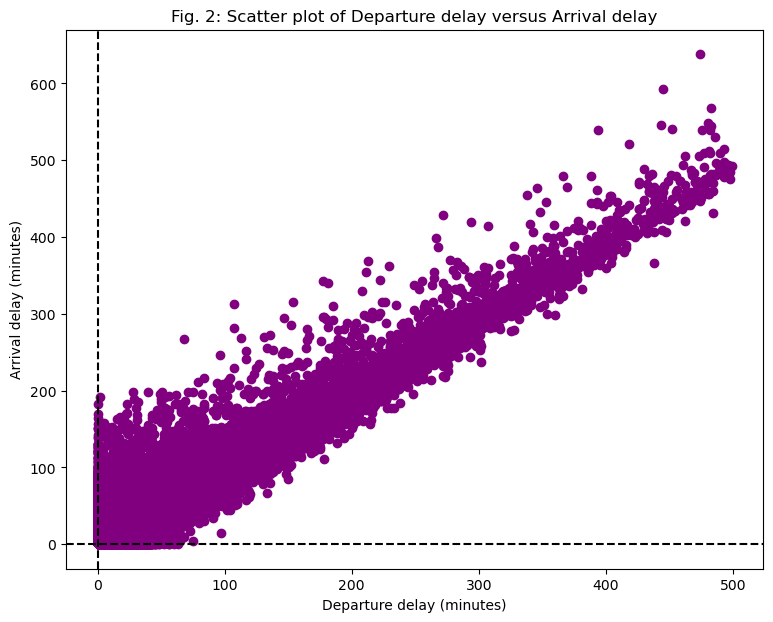

In [50]:
# generate scatter plot of departure time versus arrival time
plt.figure(figsize = (9,7))
plt.scatter(filtered_data["DEP_DELAY_NEW"], filtered_data["ARR_DELAY_NEW"],
  color = "purple")
plt.xlabel("Departure delay (minutes)")
plt.ylabel("Arrival delay (minutes)")
plt.title("Fig. 2: Scatter plot of Departure delay versus Arrival delay")
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axvline(x = 0, color = 'black', linestyle = '--')
save_path = os.path.join("..", "figures", "scatterplot_flight.png")
plt.savefig(save_path)
plt.show() 